In [14]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# This file contains all the main external libs we'll use
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [80]:
path = '/home/paperspace/fastai/nba_court_vision'
model=resnet34
sz = 450

label_csv = f'{path}/data/nba_team_label_v7'
label_df = pd.read_csv(label_csv)

In [76]:
def replace_path(f):
    return f'{path}/data/'+ '/'.join(f.split('/')[-2:])

In [77]:
f= label_df['file'][0]
f'{path}/data/'+ '/'.join(f.split('/')[-2:])

'/home/paperspace/fastai/nba_court_vision/data/team/76ers_blazers_h1_0.jpg'

In [78]:
label_df['file'] = label_df['file'].apply(replace_path)

In [79]:
label_df.to_csv(f'{path}/data/nba_team_label_v7', index=False)

In [3]:
from collections import defaultdict
home_team_inds = defaultdict(list)

In [4]:
# Compute validation indices to make sure each game only in one set
lab_df_short = label_df[label_df.index % 10 == 0].copy()
for start_index, team in zip(lab_df_short.index, lab_df_short['home_team']):
    home_team_inds[team].append(start_index)

In [108]:
val_idxs = []
s = 0
for team in home_team_inds.keys():
    n_val_inds = max(math.ceil(len(home_team_inds[team])*.2), 2) # max(20% of inds, 2)
    val_inds_sample = [list(range(ind, ind+10)) for ind \
                       in np.random.choice(home_team_inds[team], n_val_inds, replace=False)]
    [val_idxs.extend(vis for vis in val_inds_sample)]
    

In [109]:
import itertools
val_idxs = list(itertools.chain.from_iterable(val_idxs))

In [110]:
val_idxs

[140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 1230,
 1231,
 1232,
 1233,
 1234,
 1235,
 1236,
 1237,
 1238,
 1239,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 238,
 239,
 3470,
 3471,
 3472,
 3473,
 3474,
 3475,
 3476,
 3477,
 3478,
 3479,
 1540,
 1541,
 1542,
 1543,
 1544,
 1545,
 1546,
 1547,
 1548,
 1549,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 430,
 431,
 432,
 433,
 434,
 435,
 436,
 437,
 438,
 439,
 3780,
 3781,
 3782,
 3783,
 3784,
 3785,
 3786,
 3787,
 3788,
 3789,
 990,
 991,
 992,
 993,
 994,
 995,
 996,
 997,
 998,
 999,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 930,
 931,
 932,
 933,
 934,
 935,
 936,
 937,
 938,
 939,
 900,
 901,
 902,
 903,
 904,
 905,
 906,
 907,
 908,
 909,
 3120,
 3121,
 3122,
 3123,
 3124,
 3125,
 3126,
 3127,
 3128,
 3129,
 620,
 621,
 622,
 623,
 624,
 625,
 626,
 627,
 628,
 629,
 2220,
 2221,
 2222,
 2223,
 2224,
 2225,
 2226,
 2227,
 2228,
 2229,
 2170,
 2171,
 2172,
 2173,
 2174,
 2175

In [111]:
def get_data(sz):
    tfms = tfms_from_model(model, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
    return ImageClassifierData.from_csv(path, 'data', label_csv, tfms=tfms,
                                       val_idxs=val_idxs, bs=16)

In [117]:
data = get_data(450)

In [118]:
learn = ConvLearner.pretrained(model, data, metrics=[accuracy])

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))





  0%|          | 0/478 [00:00<?, ?it/s]



  0%|          | 0/478 [00:06<?, ?it/s, loss=4.33]



  0%|          | 1/478 [00:06<48:44,  6.13s/it, loss=4.33]



  0%|          | 1/478 [00:06<49:23,  6.21s/it, loss=4.51]



  0%|          | 1/478 [00:06<50:01,  6.29s/it, loss=4.27]



  1%|          | 3/478 [00:06<16:36,  2.10s/it, loss=4.27]



  1%|          | 3/478 [00:06<16:46,  2.12s/it, loss=4.13]



  1%|          | 3/478 [00:06<17:03,  2.16s/it, loss=4.08]



  1%|          | 5/478 [00:06<10:13,  1.30s/it, loss=4.08]



  1%|          | 5/478 [00:06<10:19,  1.31s/it, loss=4.2] 



  1%|          | 5/478 [00:06<10:27,  1.33s/it, loss=4.17]



  1%|▏         | 7/478 [00:06<07:26,  1.06it/s, loss=4.17]



  1%|▏         | 7/478 [00:06<07:32,  1.04it/s, loss=4.26]



  1%|▏         | 7/478 [00:06<07:38,  1.03it/s, loss=4.22]



  2%|▏         | 9/478 [00:06<05:55,  1.32it/s, loss=4.22]



  2%|▏         | 9/478 [00:06<05:59,  1.30it/s, loss=4.18]



  2%|▏         | 9/478 [00:06<0

 15%|█▍        | 70/478 [00:13<01:17,  5.27it/s, loss=4.19]



 15%|█▍        | 71/478 [00:13<01:16,  5.34it/s, loss=4.19]



 15%|█▍        | 71/478 [00:13<01:16,  5.32it/s, loss=4.2] 



 15%|█▍        | 71/478 [00:13<01:17,  5.22it/s, loss=4.19]



 15%|█▌        | 73/478 [00:13<01:15,  5.36it/s, loss=4.19]



 15%|█▌        | 73/478 [00:13<01:17,  5.21it/s, loss=4.19]



 15%|█▌        | 74/478 [00:14<01:16,  5.28it/s, loss=4.19]



 15%|█▌        | 74/478 [00:14<01:16,  5.25it/s, loss=4.17]



 15%|█▌        | 74/478 [00:14<01:17,  5.23it/s, loss=4.17]



 16%|█▌        | 76/478 [00:14<01:14,  5.37it/s, loss=4.17]



 16%|█▌        | 76/478 [00:14<01:15,  5.33it/s, loss=4.18]



 16%|█▌        | 77/478 [00:14<01:14,  5.39it/s, loss=4.18]



 16%|█▌        | 77/478 [00:14<01:14,  5.37it/s, loss=4.16]



 16%|█▌        | 77/478 [00:14<01:15,  5.30it/s, loss=4.17]



 17%|█▋        | 79/478 [00:14<01:13,  5.43it/s, loss=4.17]



 17%|█▋        | 79/478 [00:14<01:13,  5.40it/s, loss=4

 28%|██▊       | 134/478 [00:23<01:01,  5.62it/s, loss=4.12]



 28%|██▊       | 135/478 [00:23<01:00,  5.67it/s, loss=4.12]



 28%|██▊       | 135/478 [00:23<01:00,  5.65it/s, loss=4.1] 



 28%|██▊       | 135/478 [00:23<01:00,  5.63it/s, loss=4.1]



 29%|██▊       | 137/478 [00:23<00:59,  5.71it/s, loss=4.1]



 29%|██▊       | 137/478 [00:24<01:01,  5.55it/s, loss=4.1]



 29%|██▊       | 137/478 [00:24<01:01,  5.54it/s, loss=4.11]



 29%|██▉       | 139/478 [00:24<01:00,  5.61it/s, loss=4.11]



 29%|██▉       | 139/478 [00:24<01:00,  5.60it/s, loss=4.12]



 29%|██▉       | 139/478 [00:24<01:00,  5.57it/s, loss=4.12]



 29%|██▉       | 141/478 [00:24<00:59,  5.65it/s, loss=4.12]



 29%|██▉       | 141/478 [00:25<00:59,  5.63it/s, loss=4.12]



 29%|██▉       | 141/478 [00:25<01:00,  5.60it/s, loss=4.11]



 30%|██▉       | 143/478 [00:25<00:59,  5.67it/s, loss=4.11]



 30%|██▉       | 143/478 [00:25<00:59,  5.66it/s, loss=4.1] 



 30%|██▉       | 143/478 [00:25<00:59,  5.6

 41%|████▏     | 198/478 [00:34<00:48,  5.73it/s, loss=3.77]



 41%|████▏     | 198/478 [00:34<00:49,  5.70it/s, loss=3.74]



 42%|████▏     | 199/478 [00:34<00:48,  5.73it/s, loss=3.74]



 42%|████▏     | 199/478 [00:34<00:48,  5.70it/s, loss=3.74]



 42%|████▏     | 200/478 [00:34<00:48,  5.73it/s, loss=3.74]



 42%|████▏     | 200/478 [00:34<00:48,  5.71it/s, loss=3.75]



 42%|████▏     | 200/478 [00:35<00:48,  5.68it/s, loss=3.74]



 42%|████▏     | 202/478 [00:35<00:48,  5.73it/s, loss=3.74]



 42%|████▏     | 202/478 [00:35<00:48,  5.72it/s, loss=3.74]



 42%|████▏     | 202/478 [00:35<00:48,  5.70it/s, loss=3.74]



 43%|████▎     | 204/478 [00:35<00:47,  5.75it/s, loss=3.74]



 43%|████▎     | 204/478 [00:35<00:48,  5.70it/s, loss=3.71]



 43%|████▎     | 205/478 [00:35<00:47,  5.73it/s, loss=3.71]



 43%|████▎     | 205/478 [00:36<00:48,  5.64it/s, loss=3.71]



 43%|████▎     | 206/478 [00:36<00:47,  5.67it/s, loss=3.71]



 43%|████▎     | 206/478 [00:36<00:48,  

 54%|█████▍    | 258/478 [00:44<00:38,  5.78it/s, loss=3.02]



 54%|█████▍    | 258/478 [00:44<00:38,  5.74it/s, loss=3.02]



 54%|█████▍    | 259/478 [00:44<00:38,  5.76it/s, loss=3.02]



 54%|█████▍    | 259/478 [00:45<00:38,  5.75it/s, loss=3.01]



 54%|█████▍    | 259/478 [00:45<00:38,  5.70it/s, loss=3.01]



 55%|█████▍    | 261/478 [00:45<00:37,  5.75it/s, loss=3.01]



 55%|█████▍    | 261/478 [00:45<00:37,  5.73it/s, loss=3.01]



 55%|█████▍    | 262/478 [00:45<00:37,  5.75it/s, loss=3.01]



 55%|█████▍    | 262/478 [00:45<00:37,  5.73it/s, loss=3.01]



 55%|█████▌    | 263/478 [00:45<00:37,  5.75it/s, loss=3.01]



 55%|█████▌    | 263/478 [00:45<00:37,  5.73it/s, loss=3.01]



 55%|█████▌    | 264/478 [00:45<00:37,  5.75it/s, loss=3.01]



 55%|█████▌    | 264/478 [00:46<00:37,  5.74it/s, loss=2.99]



 55%|█████▌    | 265/478 [00:46<00:36,  5.76it/s, loss=2.99]



 55%|█████▌    | 265/478 [00:46<00:37,  5.73it/s, loss=2.99]



 56%|█████▌    | 266/478 [00:46<00:36,  

 67%|██████▋   | 320/478 [00:55<00:27,  5.78it/s, loss=3.79]



 67%|██████▋   | 322/478 [00:55<00:26,  5.81it/s, loss=3.79]



 67%|██████▋   | 322/478 [00:55<00:26,  5.79it/s, loss=3.84]



 68%|██████▊   | 323/478 [00:55<00:26,  5.80it/s, loss=3.84]



 68%|██████▊   | 323/478 [00:55<00:26,  5.80it/s, loss=3.87]



 68%|██████▊   | 323/478 [00:56<00:26,  5.75it/s, loss=3.89]



 68%|██████▊   | 325/478 [00:56<00:26,  5.78it/s, loss=3.89]



 68%|██████▊   | 325/478 [00:56<00:26,  5.77it/s, loss=3.94]



 68%|██████▊   | 326/478 [00:56<00:26,  5.79it/s, loss=3.94]



 68%|██████▊   | 326/478 [00:56<00:26,  5.78it/s, loss=4.08]



 68%|██████▊   | 327/478 [00:56<00:26,  5.80it/s, loss=4.08]



 68%|██████▊   | 327/478 [00:56<00:26,  5.79it/s, loss=4.14]



 68%|██████▊   | 327/478 [00:56<00:26,  5.78it/s, loss=4.27]



 69%|██████▉   | 329/478 [00:56<00:25,  5.82it/s, loss=4.27]



 69%|██████▉   | 329/478 [00:56<00:25,  5.79it/s, loss=4.36]



 69%|██████▉   | 330/478 [00:56<00:25,  

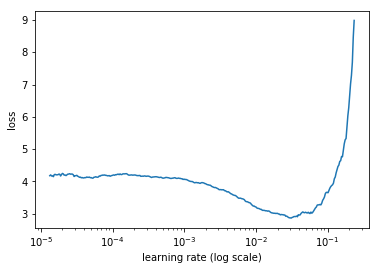

In [84]:
lrf = learn.lr_find()
learn.sched.plot()

In [119]:
lr = .01

In [120]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

[ 0.       1.83541  1.23829  0.70657]                       
[ 1.       1.18323  0.85538  0.80826]                       
[ 2.       0.93893  0.70305  0.82733]                        



In [121]:
lrs = [lr/9, lr/3, lr]
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.89663  0.6696   0.83369]                        
[ 1.       0.75605  0.54985  0.86441]                        
[ 2.       0.69773  0.55235  0.87288]                        
[ 3.       0.75398  0.52566  0.88136]                        
[ 4.       0.61852  0.52824  0.88771]                        
[ 5.       0.66739  0.51224  0.88771]                        
[ 6.       0.52514  0.51021  0.88877]                        



In [101]:
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))







  0%|          | 0/239 [00:00<?, ?it/s]





  0%|          | 0/239 [00:02<?, ?it/s, loss=0.78]





  0%|          | 1/239 [00:02<09:09,  2.31s/it, loss=0.78]





  0%|          | 1/239 [00:02<09:43,  2.45s/it, loss=0.728]





  1%|          | 2/239 [00:02<04:51,  1.23s/it, loss=0.728]





  1%|          | 2/239 [00:02<05:10,  1.31s/it, loss=0.561]





  1%|▏         | 3/239 [00:02<03:26,  1.14it/s, loss=0.561]





  1%|▏         | 3/239 [00:02<03:40,  1.07it/s, loss=0.469]





  2%|▏         | 4/239 [00:02<02:45,  1.42it/s, loss=0.469]





  2%|▏         | 4/239 [00:02<02:53,  1.35it/s, loss=0.422]





  2%|▏         | 5/239 [00:02<02:19,  1.68it/s, loss=0.422]





  2%|▏         | 5/239 [00:03<02:25,  1.61it/s, loss=0.463]





  3%|▎         | 6/239 [00:03<02:01,  1.92it/s, loss=0.463]





  3%|▎         | 6/239 [00:03<02:06,  1.84it/s, loss=0.428]





  3%|▎         | 7/239 [00:03<01:48,  2.14it/s, loss=0.428]





  3%|▎         | 7/239 [00:03<01:53,  2.05it/s, l

 21%|██        | 49/239 [00:16<01:04,  2.96it/s, loss=0.508]





 21%|██        | 49/239 [00:16<01:04,  2.93it/s, loss=0.498]





 21%|██        | 50/239 [00:16<01:03,  2.99it/s, loss=0.498]





 21%|██        | 50/239 [00:16<01:03,  2.97it/s, loss=0.495]





 21%|██▏       | 51/239 [00:16<01:02,  3.03it/s, loss=0.495]





 21%|██▏       | 51/239 [00:17<01:03,  2.97it/s, loss=0.484]





 22%|██▏       | 52/239 [00:17<01:01,  3.03it/s, loss=0.484]





 22%|██▏       | 52/239 [00:17<01:02,  3.00it/s, loss=0.491]





 22%|██▏       | 53/239 [00:17<01:00,  3.05it/s, loss=0.491]





 22%|██▏       | 53/239 [00:17<01:02,  3.00it/s, loss=0.498]





 23%|██▎       | 54/239 [00:17<01:00,  3.05it/s, loss=0.498]





 23%|██▎       | 54/239 [00:17<01:01,  3.02it/s, loss=0.493]





 23%|██▎       | 55/239 [00:17<00:59,  3.08it/s, loss=0.493]





 23%|██▎       | 55/239 [00:18<01:00,  3.05it/s, loss=0.494]





 23%|██▎       | 56/239 [00:18<00:58,  3.11it/s, loss=0.494]





 23%|██▎  

 41%|████      | 97/239 [00:32<00:46,  3.03it/s, loss=0.493]





 41%|████      | 98/239 [00:32<00:46,  3.06it/s, loss=0.493]





 41%|████      | 98/239 [00:32<00:46,  3.05it/s, loss=0.486]





 41%|████▏     | 99/239 [00:32<00:45,  3.08it/s, loss=0.486]





 41%|████▏     | 99/239 [00:32<00:45,  3.06it/s, loss=0.507]





 42%|████▏     | 100/239 [00:32<00:44,  3.09it/s, loss=0.507]





 42%|████▏     | 100/239 [00:32<00:45,  3.07it/s, loss=0.502]





 42%|████▏     | 101/239 [00:32<00:44,  3.10it/s, loss=0.502]





 42%|████▏     | 101/239 [00:32<00:44,  3.09it/s, loss=0.495]





 43%|████▎     | 102/239 [00:32<00:43,  3.12it/s, loss=0.495]





 43%|████▎     | 102/239 [00:32<00:44,  3.10it/s, loss=0.496]





 43%|████▎     | 103/239 [00:32<00:43,  3.13it/s, loss=0.496]





 43%|████▎     | 103/239 [00:33<00:43,  3.12it/s, loss=0.494]





 44%|████▎     | 104/239 [00:33<00:42,  3.15it/s, loss=0.494]





 44%|████▎     | 104/239 [00:33<00:43,  3.08it/s, loss=0.513]







 61%|██████    | 145/239 [00:46<00:30,  3.10it/s, loss=0.603]





 61%|██████    | 146/239 [00:46<00:29,  3.12it/s, loss=0.603]





 61%|██████    | 146/239 [00:46<00:29,  3.11it/s, loss=0.603]





 62%|██████▏   | 147/239 [00:46<00:29,  3.13it/s, loss=0.603]





 62%|██████▏   | 147/239 [00:47<00:29,  3.12it/s, loss=0.597]





 62%|██████▏   | 148/239 [00:47<00:28,  3.14it/s, loss=0.597]





 62%|██████▏   | 148/239 [00:47<00:29,  3.12it/s, loss=0.594]





 62%|██████▏   | 149/239 [00:47<00:28,  3.14it/s, loss=0.594]





 62%|██████▏   | 149/239 [00:47<00:28,  3.13it/s, loss=0.588]





 63%|██████▎   | 150/239 [00:47<00:28,  3.15it/s, loss=0.588]





 63%|██████▎   | 150/239 [00:47<00:28,  3.13it/s, loss=0.589]





 63%|██████▎   | 151/239 [00:47<00:27,  3.15it/s, loss=0.589]





 63%|██████▎   | 151/239 [00:48<00:28,  3.14it/s, loss=0.58] 





 64%|██████▎   | 152/239 [00:48<00:27,  3.16it/s, loss=0.58]





 64%|██████▎   | 152/239 [00:48<00:27,  3.12it/s, loss=0.584]



 81%|████████  | 193/239 [01:01<00:14,  3.14it/s, loss=0.507]





 81%|████████  | 194/239 [01:01<00:14,  3.15it/s, loss=0.507]





 81%|████████  | 194/239 [01:01<00:14,  3.14it/s, loss=0.512]





 82%|████████▏ | 195/239 [01:01<00:13,  3.16it/s, loss=0.512]





 82%|████████▏ | 195/239 [01:02<00:14,  3.14it/s, loss=0.513]





 82%|████████▏ | 196/239 [01:02<00:13,  3.16it/s, loss=0.513]





 82%|████████▏ | 196/239 [01:02<00:13,  3.13it/s, loss=0.517]





 82%|████████▏ | 197/239 [01:02<00:13,  3.15it/s, loss=0.517]





 82%|████████▏ | 197/239 [01:03<00:13,  3.12it/s, loss=0.516]





 83%|████████▎ | 198/239 [01:03<00:13,  3.14it/s, loss=0.516]





 83%|████████▎ | 198/239 [01:03<00:13,  3.13it/s, loss=0.511]





 83%|████████▎ | 199/239 [01:03<00:12,  3.15it/s, loss=0.511]





 83%|████████▎ | 199/239 [01:03<00:12,  3.14it/s, loss=0.512]





 84%|████████▎ | 200/239 [01:03<00:12,  3.15it/s, loss=0.512]





 84%|████████▎ | 200/239 [01:03<00:12,  3.14it/s, loss=0.512]


  1%|          | 2/239 [00:02<04:11,  1.06s/it, loss=0.513]





  1%|          | 2/239 [00:02<04:26,  1.12s/it, loss=0.517]





  1%|▏         | 3/239 [00:02<02:57,  1.33it/s, loss=0.517]





  1%|▏         | 3/239 [00:02<03:09,  1.25it/s, loss=0.512]





  2%|▏         | 4/239 [00:02<02:22,  1.65it/s, loss=0.512]





  2%|▏         | 4/239 [00:02<02:29,  1.57it/s, loss=0.513]





  2%|▏         | 5/239 [00:02<01:59,  1.95it/s, loss=0.513]





  2%|▏         | 5/239 [00:02<02:07,  1.84it/s, loss=0.526]





  3%|▎         | 6/239 [00:02<01:46,  2.20it/s, loss=0.526]





  3%|▎         | 6/239 [00:02<01:50,  2.10it/s, loss=0.522]





  3%|▎         | 7/239 [00:02<01:34,  2.44it/s, loss=0.522]





  3%|▎         | 7/239 [00:03<01:40,  2.32it/s, loss=0.524]





  3%|▎         | 8/239 [00:03<01:27,  2.64it/s, loss=0.524]





  3%|▎         | 8/239 [00:04<01:57,  1.96it/s, loss=0.518]





  4%|▍         | 9/239 [00:04<01:44,  2.20it/s, loss=0.518]





  4%|▍         | 9/239 [0

 21%|██        | 50/239 [00:16<01:02,  3.04it/s, loss=0.53] 





 21%|██▏       | 51/239 [00:16<01:00,  3.09it/s, loss=0.53]





 21%|██▏       | 51/239 [00:16<01:01,  3.07it/s, loss=0.534]





 22%|██▏       | 52/239 [00:16<00:59,  3.12it/s, loss=0.534]





 22%|██▏       | 52/239 [00:16<01:00,  3.10it/s, loss=0.531]





 22%|██▏       | 53/239 [00:16<00:59,  3.15it/s, loss=0.531]





 22%|██▏       | 53/239 [00:16<00:59,  3.12it/s, loss=0.539]





 23%|██▎       | 54/239 [00:16<00:58,  3.18it/s, loss=0.539]





 23%|██▎       | 54/239 [00:17<00:58,  3.14it/s, loss=0.535]





 23%|██▎       | 55/239 [00:17<00:57,  3.20it/s, loss=0.535]





 23%|██▎       | 55/239 [00:17<00:58,  3.17it/s, loss=0.541]





 23%|██▎       | 56/239 [00:17<00:56,  3.22it/s, loss=0.541]





 23%|██▎       | 56/239 [00:18<01:01,  2.98it/s, loss=0.534]





 24%|██▍       | 57/239 [00:18<00:59,  3.03it/s, loss=0.534]





 24%|██▍       | 57/239 [00:18<01:00,  3.01it/s, loss=0.539]





 24%|██▍   

 41%|████▏     | 99/239 [00:31<00:44,  3.15it/s, loss=0.514]





 41%|████▏     | 99/239 [00:31<00:44,  3.14it/s, loss=0.516]





 42%|████▏     | 100/239 [00:31<00:43,  3.17it/s, loss=0.516]





 42%|████▏     | 100/239 [00:31<00:44,  3.15it/s, loss=0.512]





 42%|████▏     | 101/239 [00:31<00:43,  3.18it/s, loss=0.512]





 42%|████▏     | 101/239 [00:31<00:43,  3.16it/s, loss=0.517]





 43%|████▎     | 102/239 [00:31<00:42,  3.19it/s, loss=0.517]





 43%|████▎     | 102/239 [00:32<00:43,  3.16it/s, loss=0.514]





 43%|████▎     | 103/239 [00:32<00:42,  3.19it/s, loss=0.514]





 43%|████▎     | 103/239 [00:32<00:43,  3.16it/s, loss=0.508]





 44%|████▎     | 104/239 [00:32<00:42,  3.19it/s, loss=0.508]





 44%|████▎     | 104/239 [00:33<00:43,  3.11it/s, loss=0.502]





 44%|████▍     | 105/239 [00:33<00:42,  3.14it/s, loss=0.502]





 44%|████▍     | 105/239 [00:33<00:42,  3.13it/s, loss=0.497]





 44%|████▍     | 106/239 [00:33<00:42,  3.15it/s, loss=0.497]




 62%|██████▏   | 147/239 [00:46<00:29,  3.17it/s, loss=0.529]





 62%|██████▏   | 147/239 [00:46<00:29,  3.16it/s, loss=0.522]





 62%|██████▏   | 148/239 [00:46<00:28,  3.18it/s, loss=0.522]





 62%|██████▏   | 148/239 [00:46<00:28,  3.17it/s, loss=0.514]





 62%|██████▏   | 149/239 [00:46<00:28,  3.19it/s, loss=0.514]





 62%|██████▏   | 149/239 [00:47<00:28,  3.17it/s, loss=0.537]





 63%|██████▎   | 150/239 [00:47<00:27,  3.19it/s, loss=0.537]





 63%|██████▎   | 150/239 [00:47<00:28,  3.17it/s, loss=0.544]





 63%|██████▎   | 151/239 [00:47<00:27,  3.19it/s, loss=0.544]





 63%|██████▎   | 151/239 [00:47<00:27,  3.16it/s, loss=0.54] 





 64%|██████▎   | 152/239 [00:47<00:27,  3.18it/s, loss=0.54]





 64%|██████▎   | 152/239 [00:48<00:27,  3.15it/s, loss=0.535]





 64%|██████▍   | 153/239 [00:48<00:27,  3.18it/s, loss=0.535]





 64%|██████▍   | 153/239 [00:48<00:27,  3.14it/s, loss=0.534]





 64%|██████▍   | 154/239 [00:48<00:26,  3.16it/s, loss=0.534]



 82%|████████▏ | 195/239 [01:01<00:13,  3.17it/s, loss=0.539]





 82%|████████▏ | 195/239 [01:01<00:13,  3.17it/s, loss=0.551]





 82%|████████▏ | 196/239 [01:01<00:13,  3.18it/s, loss=0.551]





 82%|████████▏ | 196/239 [01:01<00:13,  3.18it/s, loss=0.563]





 82%|████████▏ | 197/239 [01:01<00:13,  3.19it/s, loss=0.563]





 82%|████████▏ | 197/239 [01:01<00:13,  3.18it/s, loss=0.564]





 83%|████████▎ | 198/239 [01:01<00:12,  3.20it/s, loss=0.564]





 83%|████████▎ | 198/239 [01:02<00:12,  3.19it/s, loss=0.57] 





 83%|████████▎ | 199/239 [01:02<00:12,  3.20it/s, loss=0.57]





 83%|████████▎ | 199/239 [01:02<00:12,  3.19it/s, loss=0.582]





 84%|████████▎ | 200/239 [01:02<00:12,  3.20it/s, loss=0.582]





 84%|████████▎ | 200/239 [01:03<00:12,  3.15it/s, loss=0.584]





 84%|████████▍ | 201/239 [01:03<00:12,  3.16it/s, loss=0.584]





 84%|████████▍ | 201/239 [01:03<00:12,  3.15it/s, loss=0.58] 





 85%|████████▍ | 202/239 [01:03<00:11,  3.16it/s, loss=0.58]




  1%|▏         | 3/239 [00:02<03:29,  1.13it/s, loss=0.58] 





  2%|▏         | 4/239 [00:02<02:36,  1.50it/s, loss=0.58]





  2%|▏         | 4/239 [00:02<02:46,  1.41it/s, loss=0.577]





  2%|▏         | 5/239 [00:02<02:13,  1.76it/s, loss=0.577]





  2%|▏         | 5/239 [00:02<02:20,  1.67it/s, loss=0.576]





  3%|▎         | 6/239 [00:03<01:56,  2.00it/s, loss=0.576]





  3%|▎         | 6/239 [00:03<02:01,  1.92it/s, loss=0.569]





  3%|▎         | 7/239 [00:03<01:44,  2.23it/s, loss=0.569]





  3%|▎         | 7/239 [00:03<01:48,  2.14it/s, loss=0.574]





  3%|▎         | 8/239 [00:03<01:35,  2.42it/s, loss=0.574]





  3%|▎         | 8/239 [00:04<02:12,  1.74it/s, loss=0.565]





  4%|▍         | 9/239 [00:04<01:57,  1.96it/s, loss=0.565]





  4%|▍         | 9/239 [00:04<02:01,  1.89it/s, loss=0.56] 





  4%|▍         | 10/239 [00:04<01:49,  2.10it/s, loss=0.56]





  4%|▍         | 10/239 [00:04<01:52,  2.04it/s, loss=0.569]





  5%|▍         | 11/239 [

 22%|██▏       | 52/239 [00:17<01:02,  3.00it/s, loss=0.571]





 22%|██▏       | 52/239 [00:17<01:02,  2.97it/s, loss=0.565]





 22%|██▏       | 53/239 [00:17<01:01,  3.03it/s, loss=0.565]





 22%|██▏       | 53/239 [00:17<01:01,  3.00it/s, loss=0.569]





 23%|██▎       | 54/239 [00:17<01:00,  3.06it/s, loss=0.569]





 23%|██▎       | 54/239 [00:17<01:00,  3.03it/s, loss=0.563]





 23%|██▎       | 55/239 [00:17<00:59,  3.09it/s, loss=0.563]





 23%|██▎       | 55/239 [00:17<01:00,  3.06it/s, loss=0.569]





 23%|██▎       | 56/239 [00:17<00:58,  3.11it/s, loss=0.569]





 23%|██▎       | 56/239 [00:19<01:02,  2.93it/s, loss=0.559]





 24%|██▍       | 57/239 [00:19<01:01,  2.98it/s, loss=0.559]





 24%|██▍       | 57/239 [00:19<01:02,  2.92it/s, loss=0.559]





 24%|██▍       | 58/239 [00:19<01:01,  2.97it/s, loss=0.559]





 24%|██▍       | 58/239 [00:19<01:01,  2.95it/s, loss=0.554]





 25%|██▍       | 59/239 [00:19<01:00,  2.99it/s, loss=0.554]





 25%|██▍  

 42%|████▏     | 100/239 [00:32<00:45,  3.09it/s, loss=0.522]





 42%|████▏     | 101/239 [00:32<00:44,  3.11it/s, loss=0.522]





 42%|████▏     | 101/239 [00:32<00:44,  3.08it/s, loss=0.533]





 43%|████▎     | 102/239 [00:32<00:44,  3.11it/s, loss=0.533]





 43%|████▎     | 102/239 [00:32<00:44,  3.10it/s, loss=0.532]





 43%|████▎     | 103/239 [00:32<00:43,  3.13it/s, loss=0.532]





 43%|████▎     | 103/239 [00:33<00:43,  3.11it/s, loss=0.541]





 44%|████▎     | 104/239 [00:33<00:42,  3.14it/s, loss=0.541]





 44%|████▎     | 104/239 [00:34<00:44,  3.04it/s, loss=0.535]





 44%|████▍     | 105/239 [00:34<00:43,  3.07it/s, loss=0.535]





 44%|████▍     | 105/239 [00:34<00:43,  3.05it/s, loss=0.53] 





 44%|████▍     | 106/239 [00:34<00:43,  3.08it/s, loss=0.53]





 44%|████▍     | 106/239 [00:34<00:43,  3.07it/s, loss=0.529]





 45%|████▍     | 107/239 [00:34<00:42,  3.09it/s, loss=0.529]





 45%|████▍     | 107/239 [00:34<00:42,  3.08it/s, loss=0.532]



 62%|██████▏   | 148/239 [00:47<00:29,  3.11it/s, loss=0.485]





 62%|██████▏   | 149/239 [00:47<00:28,  3.13it/s, loss=0.485]





 62%|██████▏   | 149/239 [00:47<00:28,  3.12it/s, loss=0.481]





 63%|██████▎   | 150/239 [00:47<00:28,  3.14it/s, loss=0.481]





 63%|██████▎   | 150/239 [00:48<00:28,  3.11it/s, loss=0.474]





 63%|██████▎   | 151/239 [00:48<00:28,  3.13it/s, loss=0.474]





 63%|██████▎   | 151/239 [00:48<00:28,  3.12it/s, loss=0.467]





 64%|██████▎   | 152/239 [00:48<00:27,  3.14it/s, loss=0.467]





 64%|██████▎   | 152/239 [00:49<00:28,  3.09it/s, loss=0.463]





 64%|██████▍   | 153/239 [00:49<00:27,  3.11it/s, loss=0.463]





 64%|██████▍   | 153/239 [00:49<00:27,  3.08it/s, loss=0.466]





 64%|██████▍   | 154/239 [00:49<00:27,  3.10it/s, loss=0.466]





 64%|██████▍   | 154/239 [00:49<00:27,  3.09it/s, loss=0.463]





 65%|██████▍   | 155/239 [00:49<00:26,  3.11it/s, loss=0.463]





 65%|██████▍   | 155/239 [00:49<00:27,  3.10it/s, loss=0.461]


 82%|████████▏ | 196/239 [01:02<00:13,  3.13it/s, loss=0.467]





 82%|████████▏ | 197/239 [01:02<00:13,  3.15it/s, loss=0.467]





 82%|████████▏ | 197/239 [01:02<00:13,  3.13it/s, loss=0.466]





 83%|████████▎ | 198/239 [01:02<00:13,  3.14it/s, loss=0.466]





 83%|████████▎ | 198/239 [01:03<00:13,  3.13it/s, loss=0.47] 





 83%|████████▎ | 199/239 [01:03<00:12,  3.14it/s, loss=0.47]





 83%|████████▎ | 199/239 [01:03<00:12,  3.12it/s, loss=0.47]





 84%|████████▎ | 200/239 [01:03<00:12,  3.14it/s, loss=0.47]





 84%|████████▎ | 200/239 [01:04<00:12,  3.10it/s, loss=0.476]





 84%|████████▍ | 201/239 [01:04<00:12,  3.12it/s, loss=0.476]





 84%|████████▍ | 201/239 [01:04<00:12,  3.11it/s, loss=0.485]





 85%|████████▍ | 202/239 [01:04<00:11,  3.12it/s, loss=0.485]





 85%|████████▍ | 202/239 [01:04<00:11,  3.12it/s, loss=0.492]





 85%|████████▍ | 203/239 [01:04<00:11,  3.13it/s, loss=0.492]





 85%|████████▍ | 203/239 [01:04<00:11,  3.13it/s, loss=0.487]





  2%|▏         | 5/239 [00:02<02:11,  1.79it/s, loss=0.482]





  2%|▏         | 5/239 [00:02<02:17,  1.70it/s, loss=0.475]





  3%|▎         | 6/239 [00:02<01:55,  2.02it/s, loss=0.475]





  3%|▎         | 6/239 [00:03<02:00,  1.94it/s, loss=0.467]





  3%|▎         | 7/239 [00:03<01:42,  2.25it/s, loss=0.467]





  3%|▎         | 7/239 [00:03<01:48,  2.14it/s, loss=0.472]





  3%|▎         | 8/239 [00:03<01:35,  2.43it/s, loss=0.472]





  3%|▎         | 8/239 [00:04<02:22,  1.62it/s, loss=0.469]





  4%|▍         | 9/239 [00:04<02:06,  1.81it/s, loss=0.469]





  4%|▍         | 9/239 [00:05<02:10,  1.77it/s, loss=0.467]





  4%|▍         | 10/239 [00:05<01:56,  1.96it/s, loss=0.467]





  4%|▍         | 10/239 [00:05<01:59,  1.91it/s, loss=0.465]





  5%|▍         | 11/239 [00:05<01:48,  2.10it/s, loss=0.465]





  5%|▍         | 11/239 [00:05<01:51,  2.04it/s, loss=0.471]





  5%|▌         | 12/239 [00:05<01:42,  2.23it/s, loss=0.471]





  5%|▌         | 12/

 22%|██▏       | 53/239 [00:17<01:02,  2.97it/s, loss=0.483]





 23%|██▎       | 54/239 [00:17<01:01,  3.03it/s, loss=0.483]





 23%|██▎       | 54/239 [00:17<01:01,  3.00it/s, loss=0.487]





 23%|██▎       | 55/239 [00:18<01:00,  3.05it/s, loss=0.487]





 23%|██▎       | 55/239 [00:18<01:01,  2.98it/s, loss=0.486]





 23%|██▎       | 56/239 [00:18<01:00,  3.03it/s, loss=0.486]





 23%|██▎       | 56/239 [00:19<01:02,  2.94it/s, loss=0.498]





 24%|██▍       | 57/239 [00:19<01:00,  2.99it/s, loss=0.498]





 24%|██▍       | 57/239 [00:19<01:01,  2.96it/s, loss=0.496]





 24%|██▍       | 58/239 [00:19<01:00,  3.01it/s, loss=0.496]





 24%|██▍       | 58/239 [00:19<01:01,  2.96it/s, loss=0.495]





 25%|██▍       | 59/239 [00:19<00:59,  3.01it/s, loss=0.495]





 25%|██▍       | 59/239 [00:19<01:00,  2.99it/s, loss=0.5]  





 25%|██▌       | 60/239 [00:19<00:58,  3.03it/s, loss=0.5]





 25%|██▌       | 60/239 [00:20<01:00,  2.96it/s, loss=0.499]





 26%|██▌    

 43%|████▎     | 102/239 [00:32<00:44,  3.11it/s, loss=0.513]





 43%|████▎     | 102/239 [00:33<00:44,  3.06it/s, loss=0.511]





 43%|████▎     | 103/239 [00:33<00:44,  3.08it/s, loss=0.511]





 43%|████▎     | 103/239 [00:33<00:44,  3.07it/s, loss=0.507]





 44%|████▎     | 104/239 [00:33<00:43,  3.10it/s, loss=0.507]





 44%|████▎     | 104/239 [00:33<00:43,  3.09it/s, loss=0.505]





 44%|████▍     | 105/239 [00:33<00:43,  3.11it/s, loss=0.505]





 44%|████▍     | 105/239 [00:34<00:43,  3.08it/s, loss=0.502]





 44%|████▍     | 106/239 [00:34<00:42,  3.11it/s, loss=0.502]





 44%|████▍     | 106/239 [00:34<00:43,  3.09it/s, loss=0.498]





 45%|████▍     | 107/239 [00:34<00:42,  3.12it/s, loss=0.498]





 45%|████▍     | 107/239 [00:34<00:42,  3.07it/s, loss=0.501]





 45%|████▌     | 108/239 [00:34<00:42,  3.10it/s, loss=0.501]





 45%|████▌     | 108/239 [00:35<00:42,  3.06it/s, loss=0.499]





 46%|████▌     | 109/239 [00:35<00:42,  3.09it/s, loss=0.499]


 63%|██████▎   | 150/239 [00:47<00:28,  3.14it/s, loss=0.488]





 63%|██████▎   | 150/239 [00:48<00:28,  3.12it/s, loss=0.493]





 63%|██████▎   | 151/239 [00:48<00:28,  3.14it/s, loss=0.493]





 63%|██████▎   | 151/239 [00:48<00:28,  3.13it/s, loss=0.496]





 64%|██████▎   | 152/239 [00:48<00:27,  3.15it/s, loss=0.496]





 64%|██████▎   | 152/239 [00:48<00:27,  3.14it/s, loss=0.493]





 64%|██████▍   | 153/239 [00:48<00:27,  3.16it/s, loss=0.493]





 64%|██████▍   | 153/239 [00:48<00:27,  3.13it/s, loss=0.489]





 64%|██████▍   | 154/239 [00:48<00:27,  3.15it/s, loss=0.489]





 64%|██████▍   | 154/239 [00:49<00:27,  3.13it/s, loss=0.488]





 65%|██████▍   | 155/239 [00:49<00:26,  3.15it/s, loss=0.488]





 65%|██████▍   | 155/239 [00:49<00:26,  3.11it/s, loss=0.486]





 65%|██████▌   | 156/239 [00:49<00:26,  3.13it/s, loss=0.486]





 65%|██████▌   | 156/239 [00:49<00:26,  3.12it/s, loss=0.479]





 66%|██████▌   | 157/239 [00:49<00:26,  3.14it/s, loss=0.479]


 83%|████████▎ | 198/239 [01:02<00:12,  3.16it/s, loss=0.494]





 83%|████████▎ | 198/239 [01:03<00:13,  3.13it/s, loss=0.497]





 83%|████████▎ | 199/239 [01:03<00:12,  3.15it/s, loss=0.497]





 83%|████████▎ | 199/239 [01:03<00:12,  3.14it/s, loss=0.513]





 84%|████████▎ | 200/239 [01:03<00:12,  3.15it/s, loss=0.513]





 84%|████████▎ | 200/239 [01:03<00:12,  3.15it/s, loss=0.513]





 84%|████████▍ | 201/239 [01:03<00:12,  3.16it/s, loss=0.513]





 84%|████████▍ | 201/239 [01:03<00:12,  3.15it/s, loss=0.516]





 85%|████████▍ | 202/239 [01:03<00:11,  3.17it/s, loss=0.516]





 85%|████████▍ | 202/239 [01:04<00:11,  3.14it/s, loss=0.52] 





 85%|████████▍ | 203/239 [01:04<00:11,  3.15it/s, loss=0.52]





 85%|████████▍ | 203/239 [01:04<00:11,  3.14it/s, loss=0.526]





 85%|████████▌ | 204/239 [01:04<00:11,  3.16it/s, loss=0.526]





 85%|████████▌ | 204/239 [01:04<00:11,  3.15it/s, loss=0.536]





 86%|████████▌ | 205/239 [01:04<00:10,  3.16it/s, loss=0.536]



  3%|▎         | 6/239 [00:03<02:02,  1.91it/s, loss=0.55] 





  3%|▎         | 7/239 [00:03<01:44,  2.22it/s, loss=0.55]





  3%|▎         | 7/239 [00:03<01:48,  2.14it/s, loss=0.543]





  3%|▎         | 8/239 [00:03<01:34,  2.44it/s, loss=0.543]





  3%|▎         | 8/239 [00:04<02:11,  1.76it/s, loss=0.535]





  4%|▍         | 9/239 [00:04<01:56,  1.97it/s, loss=0.535]





  4%|▍         | 9/239 [00:04<02:02,  1.88it/s, loss=0.536]





  4%|▍         | 10/239 [00:04<01:49,  2.08it/s, loss=0.536]





  4%|▍         | 10/239 [00:04<01:53,  2.01it/s, loss=0.535]





  5%|▍         | 11/239 [00:04<01:43,  2.20it/s, loss=0.535]





  5%|▍         | 11/239 [00:05<01:46,  2.15it/s, loss=0.538]





  5%|▌         | 12/239 [00:05<01:36,  2.34it/s, loss=0.538]





  5%|▌         | 12/239 [00:05<01:39,  2.28it/s, loss=0.529]





  5%|▌         | 13/239 [00:05<01:31,  2.46it/s, loss=0.529]





  5%|▌         | 13/239 [00:05<01:34,  2.39it/s, loss=0.536]





  6%|▌         | 1

 23%|██▎       | 55/239 [00:17<00:59,  3.08it/s, loss=0.476]





 23%|██▎       | 55/239 [00:17<01:00,  3.06it/s, loss=0.493]





 23%|██▎       | 56/239 [00:17<00:58,  3.11it/s, loss=0.493]





 23%|██▎       | 56/239 [00:19<01:02,  2.94it/s, loss=0.499]





 24%|██▍       | 57/239 [00:19<01:00,  2.99it/s, loss=0.499]





 24%|██▍       | 57/239 [00:19<01:01,  2.96it/s, loss=0.495]





 24%|██▍       | 58/239 [00:19<01:00,  3.00it/s, loss=0.495]





 24%|██▍       | 58/239 [00:19<01:01,  2.96it/s, loss=0.491]





 25%|██▍       | 59/239 [00:19<00:59,  3.01it/s, loss=0.491]





 25%|██▍       | 59/239 [00:19<01:00,  2.98it/s, loss=0.49] 





 25%|██▌       | 60/239 [00:19<00:59,  3.03it/s, loss=0.49]





 25%|██▌       | 60/239 [00:19<00:59,  3.01it/s, loss=0.489]





 26%|██▌       | 61/239 [00:19<00:58,  3.06it/s, loss=0.489]





 26%|██▌       | 61/239 [00:20<00:58,  3.04it/s, loss=0.482]





 26%|██▌       | 62/239 [00:20<00:57,  3.08it/s, loss=0.482]





 26%|██▌   

 43%|████▎     | 103/239 [00:33<00:43,  3.11it/s, loss=0.477]





 44%|████▎     | 104/239 [00:33<00:43,  3.14it/s, loss=0.477]





 44%|████▎     | 104/239 [00:33<00:43,  3.11it/s, loss=0.473]





 44%|████▍     | 105/239 [00:33<00:42,  3.14it/s, loss=0.473]





 44%|████▍     | 105/239 [00:34<00:43,  3.07it/s, loss=0.484]





 44%|████▍     | 106/239 [00:34<00:42,  3.10it/s, loss=0.484]





 44%|████▍     | 106/239 [00:34<00:43,  3.07it/s, loss=0.481]





 45%|████▍     | 107/239 [00:34<00:42,  3.10it/s, loss=0.481]





 45%|████▍     | 107/239 [00:34<00:42,  3.09it/s, loss=0.497]





 45%|████▌     | 108/239 [00:34<00:42,  3.12it/s, loss=0.497]





 45%|████▌     | 108/239 [00:35<00:42,  3.07it/s, loss=0.492]





 46%|████▌     | 109/239 [00:35<00:41,  3.10it/s, loss=0.492]





 46%|████▌     | 109/239 [00:35<00:42,  3.08it/s, loss=0.504]





 46%|████▌     | 110/239 [00:35<00:41,  3.11it/s, loss=0.504]





 46%|████▌     | 110/239 [00:35<00:41,  3.10it/s, loss=0.498]


 63%|██████▎   | 151/239 [00:48<00:28,  3.14it/s, loss=0.455]





 64%|██████▎   | 152/239 [00:48<00:27,  3.16it/s, loss=0.455]





 64%|██████▎   | 152/239 [00:48<00:27,  3.15it/s, loss=0.452]





 64%|██████▍   | 153/239 [00:48<00:27,  3.17it/s, loss=0.452]





 64%|██████▍   | 153/239 [00:49<00:27,  3.11it/s, loss=0.446]





 64%|██████▍   | 154/239 [00:49<00:27,  3.13it/s, loss=0.446]





 64%|██████▍   | 154/239 [00:49<00:27,  3.12it/s, loss=0.443]





 65%|██████▍   | 155/239 [00:49<00:26,  3.14it/s, loss=0.443]





 65%|██████▍   | 155/239 [00:49<00:27,  3.11it/s, loss=0.454]





 65%|██████▌   | 156/239 [00:49<00:26,  3.13it/s, loss=0.454]





 65%|██████▌   | 156/239 [00:50<00:26,  3.12it/s, loss=0.461]





 66%|██████▌   | 157/239 [00:50<00:26,  3.14it/s, loss=0.461]





 66%|██████▌   | 157/239 [00:50<00:26,  3.13it/s, loss=0.463]





 66%|██████▌   | 158/239 [00:50<00:25,  3.15it/s, loss=0.463]





 66%|██████▌   | 158/239 [00:50<00:25,  3.14it/s, loss=0.463]


 83%|████████▎ | 199/239 [01:03<00:12,  3.15it/s, loss=0.451]





 84%|████████▎ | 200/239 [01:03<00:12,  3.16it/s, loss=0.451]





 84%|████████▎ | 200/239 [01:03<00:12,  3.16it/s, loss=0.454]





 84%|████████▍ | 201/239 [01:03<00:11,  3.17it/s, loss=0.454]





 84%|████████▍ | 201/239 [01:03<00:12,  3.15it/s, loss=0.452]





 85%|████████▍ | 202/239 [01:03<00:11,  3.16it/s, loss=0.452]





 85%|████████▍ | 202/239 [01:04<00:11,  3.14it/s, loss=0.449]





 85%|████████▍ | 203/239 [01:04<00:11,  3.16it/s, loss=0.449]





 85%|████████▍ | 203/239 [01:04<00:11,  3.15it/s, loss=0.45] 





 85%|████████▌ | 204/239 [01:04<00:11,  3.17it/s, loss=0.45]





 85%|████████▌ | 204/239 [01:05<00:11,  3.14it/s, loss=0.45]





 86%|████████▌ | 205/239 [01:05<00:10,  3.15it/s, loss=0.45]





 86%|████████▌ | 205/239 [01:05<00:10,  3.13it/s, loss=0.453]





 86%|████████▌ | 206/239 [01:05<00:10,  3.15it/s, loss=0.453]





 86%|████████▌ | 206/239 [01:05<00:10,  3.14it/s, loss=0.447]





  3%|▎         | 8/239 [00:03<01:35,  2.41it/s, loss=0.457]





  3%|▎         | 8/239 [00:04<02:10,  1.77it/s, loss=0.462]





  4%|▍         | 9/239 [00:04<01:55,  1.99it/s, loss=0.462]





  4%|▍         | 9/239 [00:04<01:58,  1.93it/s, loss=0.456]





  4%|▍         | 10/239 [00:04<01:46,  2.14it/s, loss=0.456]





  4%|▍         | 10/239 [00:04<01:49,  2.08it/s, loss=0.452]





  5%|▍         | 11/239 [00:04<01:39,  2.28it/s, loss=0.452]





  5%|▍         | 11/239 [00:04<01:42,  2.21it/s, loss=0.451]





  5%|▌         | 12/239 [00:04<01:34,  2.41it/s, loss=0.451]





  5%|▌         | 12/239 [00:05<01:37,  2.34it/s, loss=0.454]





  5%|▌         | 13/239 [00:05<01:29,  2.52it/s, loss=0.454]





  5%|▌         | 13/239 [00:05<01:31,  2.46it/s, loss=0.45] 





  6%|▌         | 14/239 [00:05<01:25,  2.64it/s, loss=0.45]





  6%|▌         | 14/239 [00:05<01:27,  2.57it/s, loss=0.446]





  6%|▋         | 15/239 [00:05<01:21,  2.75it/s, loss=0.446]





  6%|▋         

 23%|██▎       | 56/239 [00:19<01:02,  2.95it/s, loss=0.428]





 24%|██▍       | 57/239 [00:19<01:00,  3.00it/s, loss=0.428]





 24%|██▍       | 57/239 [00:19<01:01,  2.97it/s, loss=0.424]





 24%|██▍       | 58/239 [00:19<01:00,  3.01it/s, loss=0.424]





 24%|██▍       | 58/239 [00:19<01:00,  2.99it/s, loss=0.43] 





 25%|██▍       | 59/239 [00:19<00:59,  3.04it/s, loss=0.43]





 25%|██▍       | 59/239 [00:19<00:59,  3.02it/s, loss=0.44]





 25%|██▌       | 60/239 [00:19<00:58,  3.07it/s, loss=0.44]





 25%|██▌       | 60/239 [00:19<00:58,  3.04it/s, loss=0.434]





 26%|██▌       | 61/239 [00:19<00:57,  3.08it/s, loss=0.434]





 26%|██▌       | 61/239 [00:20<00:58,  3.05it/s, loss=0.427]





 26%|██▌       | 62/239 [00:20<00:57,  3.09it/s, loss=0.427]





 26%|██▌       | 62/239 [00:20<00:57,  3.07it/s, loss=0.425]





 26%|██▋       | 63/239 [00:20<00:56,  3.12it/s, loss=0.425]





 26%|██▋       | 63/239 [00:20<00:56,  3.09it/s, loss=0.419]





 27%|██▋     

 44%|████▍     | 105/239 [00:33<00:43,  3.11it/s, loss=0.407]





 44%|████▍     | 105/239 [00:34<00:43,  3.08it/s, loss=0.404]





 44%|████▍     | 106/239 [00:34<00:42,  3.10it/s, loss=0.404]





 44%|████▍     | 106/239 [00:34<00:43,  3.09it/s, loss=0.398]





 45%|████▍     | 107/239 [00:34<00:42,  3.12it/s, loss=0.398]





 45%|████▍     | 107/239 [00:34<00:42,  3.09it/s, loss=0.407]





 45%|████▌     | 108/239 [00:34<00:41,  3.12it/s, loss=0.407]





 45%|████▌     | 108/239 [00:34<00:42,  3.11it/s, loss=0.408]





 46%|████▌     | 109/239 [00:34<00:41,  3.14it/s, loss=0.408]





 46%|████▌     | 109/239 [00:34<00:41,  3.13it/s, loss=0.408]





 46%|████▌     | 110/239 [00:34<00:40,  3.15it/s, loss=0.408]





 46%|████▌     | 110/239 [00:35<00:41,  3.14it/s, loss=0.407]





 46%|████▋     | 111/239 [00:35<00:40,  3.16it/s, loss=0.407]





 46%|████▋     | 111/239 [00:35<00:41,  3.11it/s, loss=0.405]





 47%|████▋     | 112/239 [00:35<00:40,  3.14it/s, loss=0.405]


 64%|██████▍   | 153/239 [00:48<00:27,  3.12it/s, loss=0.403]





 64%|██████▍   | 153/239 [00:49<00:27,  3.11it/s, loss=0.407]





 64%|██████▍   | 154/239 [00:49<00:27,  3.13it/s, loss=0.407]





 64%|██████▍   | 154/239 [00:49<00:27,  3.13it/s, loss=0.41] 





 65%|██████▍   | 155/239 [00:49<00:26,  3.15it/s, loss=0.41]





 65%|██████▍   | 155/239 [00:49<00:26,  3.14it/s, loss=0.414]





 65%|██████▌   | 156/239 [00:49<00:26,  3.16it/s, loss=0.414]





 65%|██████▌   | 156/239 [00:49<00:26,  3.15it/s, loss=0.409]





 66%|██████▌   | 157/239 [00:49<00:25,  3.17it/s, loss=0.409]





 66%|██████▌   | 157/239 [00:49<00:26,  3.15it/s, loss=0.412]





 66%|██████▌   | 158/239 [00:49<00:25,  3.17it/s, loss=0.412]





 66%|██████▌   | 158/239 [00:50<00:25,  3.15it/s, loss=0.406]





 67%|██████▋   | 159/239 [00:50<00:25,  3.17it/s, loss=0.406]





 67%|██████▋   | 159/239 [00:50<00:25,  3.15it/s, loss=0.405]





 67%|██████▋   | 160/239 [00:50<00:24,  3.17it/s, loss=0.405]



 84%|████████▍ | 201/239 [01:03<00:12,  3.16it/s, loss=0.41]





 84%|████████▍ | 201/239 [01:04<00:12,  3.14it/s, loss=0.418]





 85%|████████▍ | 202/239 [01:04<00:11,  3.16it/s, loss=0.418]





 85%|████████▍ | 202/239 [01:04<00:11,  3.14it/s, loss=0.414]





 85%|████████▍ | 203/239 [01:04<00:11,  3.16it/s, loss=0.414]





 85%|████████▍ | 203/239 [01:04<00:11,  3.15it/s, loss=0.418]





 85%|████████▌ | 204/239 [01:04<00:11,  3.16it/s, loss=0.418]





 85%|████████▌ | 204/239 [01:04<00:11,  3.15it/s, loss=0.413]





 86%|████████▌ | 205/239 [01:04<00:10,  3.17it/s, loss=0.413]





 86%|████████▌ | 205/239 [01:05<00:10,  3.15it/s, loss=0.423]





 86%|████████▌ | 206/239 [01:05<00:10,  3.16it/s, loss=0.423]





 86%|████████▌ | 206/239 [01:05<00:10,  3.15it/s, loss=0.422]





 87%|████████▋ | 207/239 [01:05<00:10,  3.17it/s, loss=0.422]





 87%|████████▋ | 207/239 [01:05<00:10,  3.15it/s, loss=0.419]





 87%|████████▋ | 208/239 [01:05<00:09,  3.17it/s, loss=0.419]



  4%|▍         | 9/239 [00:04<01:58,  1.95it/s, loss=0.466]





  4%|▍         | 10/239 [00:04<01:46,  2.16it/s, loss=0.466]





  4%|▍         | 10/239 [00:04<01:49,  2.10it/s, loss=0.466]





  5%|▍         | 11/239 [00:04<01:38,  2.31it/s, loss=0.466]





  5%|▍         | 11/239 [00:04<01:41,  2.24it/s, loss=0.46] 





  5%|▌         | 12/239 [00:04<01:33,  2.43it/s, loss=0.46]





  5%|▌         | 12/239 [00:05<01:35,  2.37it/s, loss=0.454]





  5%|▌         | 13/239 [00:05<01:28,  2.56it/s, loss=0.454]





  5%|▌         | 13/239 [00:05<01:30,  2.49it/s, loss=0.457]





  6%|▌         | 14/239 [00:05<01:24,  2.68it/s, loss=0.457]





  6%|▌         | 14/239 [00:05<01:26,  2.59it/s, loss=0.46] 





  6%|▋         | 15/239 [00:05<01:20,  2.77it/s, loss=0.46]





  6%|▋         | 15/239 [00:05<01:23,  2.69it/s, loss=0.465]





  7%|▋         | 16/239 [00:05<01:18,  2.85it/s, loss=0.465]





  7%|▋         | 16/239 [00:06<01:36,  2.31it/s, loss=0.457]





  7%|▋       

 24%|██▍       | 58/239 [00:19<01:00,  2.97it/s, loss=0.419]





 24%|██▍       | 58/239 [00:19<01:01,  2.94it/s, loss=0.416]





 25%|██▍       | 59/239 [00:19<01:00,  2.98it/s, loss=0.416]





 25%|██▍       | 59/239 [00:19<01:00,  2.96it/s, loss=0.412]





 25%|██▌       | 60/239 [00:19<00:59,  3.00it/s, loss=0.412]





 25%|██▌       | 60/239 [00:20<01:00,  2.98it/s, loss=0.406]





 26%|██▌       | 61/239 [00:20<00:58,  3.03it/s, loss=0.406]





 26%|██▌       | 61/239 [00:20<00:59,  3.01it/s, loss=0.404]





 26%|██▌       | 62/239 [00:20<00:57,  3.06it/s, loss=0.404]





 26%|██▌       | 62/239 [00:20<00:58,  3.04it/s, loss=0.399]





 26%|██▋       | 63/239 [00:20<00:57,  3.09it/s, loss=0.399]





 26%|██▋       | 63/239 [00:20<00:57,  3.06it/s, loss=0.398]





 27%|██▋       | 64/239 [00:20<00:56,  3.11it/s, loss=0.398]





 27%|██▋       | 64/239 [00:21<00:59,  2.95it/s, loss=0.399]





 27%|██▋       | 65/239 [00:21<00:58,  2.99it/s, loss=0.399]





 27%|██▋  

 44%|████▍     | 106/239 [00:34<00:43,  3.07it/s, loss=0.403]





 45%|████▍     | 107/239 [00:34<00:42,  3.10it/s, loss=0.403]





 45%|████▍     | 107/239 [00:34<00:42,  3.07it/s, loss=0.411]





 45%|████▌     | 108/239 [00:34<00:42,  3.10it/s, loss=0.411]





 45%|████▌     | 108/239 [00:34<00:42,  3.09it/s, loss=0.421]





 46%|████▌     | 109/239 [00:35<00:41,  3.11it/s, loss=0.421]





 46%|████▌     | 109/239 [00:35<00:41,  3.10it/s, loss=0.42] 





 46%|████▌     | 110/239 [00:35<00:41,  3.13it/s, loss=0.42]





 46%|████▌     | 110/239 [00:35<00:41,  3.11it/s, loss=0.425]





 46%|████▋     | 111/239 [00:35<00:40,  3.14it/s, loss=0.425]





 46%|████▋     | 111/239 [00:35<00:40,  3.12it/s, loss=0.432]





 47%|████▋     | 112/239 [00:35<00:40,  3.15it/s, loss=0.432]





 47%|████▋     | 112/239 [00:36<00:41,  3.08it/s, loss=0.44] 





 47%|████▋     | 113/239 [00:36<00:40,  3.10it/s, loss=0.44]





 47%|████▋     | 113/239 [00:36<00:40,  3.08it/s, loss=0.433]




 64%|██████▍   | 154/239 [00:49<00:27,  3.10it/s, loss=0.411]





 65%|██████▍   | 155/239 [00:49<00:26,  3.12it/s, loss=0.411]





 65%|██████▍   | 155/239 [00:50<00:27,  3.09it/s, loss=0.412]





 65%|██████▌   | 156/239 [00:50<00:26,  3.11it/s, loss=0.412]





 65%|██████▌   | 156/239 [00:50<00:26,  3.10it/s, loss=0.406]





 66%|██████▌   | 157/239 [00:50<00:26,  3.12it/s, loss=0.406]





 66%|██████▌   | 157/239 [00:50<00:26,  3.11it/s, loss=0.402]





 66%|██████▌   | 158/239 [00:50<00:25,  3.13it/s, loss=0.402]





 66%|██████▌   | 158/239 [00:50<00:25,  3.12it/s, loss=0.407]





 67%|██████▋   | 159/239 [00:50<00:25,  3.14it/s, loss=0.407]





 67%|██████▋   | 159/239 [00:50<00:25,  3.13it/s, loss=0.401]





 67%|██████▋   | 160/239 [00:50<00:25,  3.15it/s, loss=0.401]





 67%|██████▋   | 160/239 [00:51<00:25,  3.11it/s, loss=0.396]





 67%|██████▋   | 161/239 [00:51<00:24,  3.13it/s, loss=0.396]





 67%|██████▋   | 161/239 [00:51<00:25,  3.10it/s, loss=0.395]


 85%|████████▍ | 202/239 [01:04<00:11,  3.11it/s, loss=0.424]





 85%|████████▍ | 203/239 [01:04<00:11,  3.13it/s, loss=0.424]





 85%|████████▍ | 203/239 [01:05<00:11,  3.12it/s, loss=0.421]





 85%|████████▌ | 204/239 [01:05<00:11,  3.14it/s, loss=0.421]





 85%|████████▌ | 204/239 [01:05<00:11,  3.13it/s, loss=0.423]





 86%|████████▌ | 205/239 [01:05<00:10,  3.14it/s, loss=0.423]





 86%|████████▌ | 205/239 [01:05<00:10,  3.14it/s, loss=0.424]





 86%|████████▌ | 206/239 [01:05<00:10,  3.15it/s, loss=0.424]





 86%|████████▌ | 206/239 [01:05<00:10,  3.14it/s, loss=0.421]





 87%|████████▋ | 207/239 [01:05<00:10,  3.15it/s, loss=0.421]





 87%|████████▋ | 207/239 [01:05<00:10,  3.14it/s, loss=0.418]





 87%|████████▋ | 208/239 [01:05<00:09,  3.16it/s, loss=0.418]





 87%|████████▋ | 208/239 [01:06<00:09,  3.12it/s, loss=0.42] 





 87%|████████▋ | 209/239 [01:06<00:09,  3.14it/s, loss=0.42]





 87%|████████▋ | 209/239 [01:06<00:09,  3.13it/s, loss=0.415]



In [122]:
preds = learn.predict()
preds_tta = learn.TTA()

In [124]:
res_df = pd.DataFrame()
res_df['class_pred'] = np.argmax(preds, axis=1)
res_df['class_act'] = data.val_y
res_df['correct'] = (res_df['class_pred'] == res_df['class_act']).astype(int)

In [125]:
res_df['correct'].mean()

0.88709677419354838